In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib notebook

In [7]:
spec1 = pd.read_csv("LAMOST/T8000g1.00z-2.50c+3.00.dat", header=None, sep="\s+")
spec2 = pd.read_csv("LAMOST/8000g1.0z-2.25a0.4C3.0.ext_t1.88_C+3.00N+3.00C1310.spec.gz", header=None, sep="\s+")

In [8]:
### Interpolate spectrum

interp = interpolate.interp1d(np.linspace(3000,10000, len(spec2)), spec2[0])

In [9]:
len(spec2)


700002

In [13]:
def resample(spectrum, step):
    increment = int(len(spectrum)/step)
    wavelength = np.linspace(3000,10000, len(spectrum))
    new_wl = []
    new_flux = []
    for i in range(step - 1):
        new_flux.append(np.sum(spectrum[0].iloc[i*increment: (i+1)*increment]))
        new_wl.append(np.median(wavelength[i*increment: (i+1)*increment]))
        
    return pd.DataFrame({"wave":new_wl, "flux":new_flux})

In [14]:
sampled_spectrum = resample(spec2, len(spec1))

<IPython.core.display.Javascript object>


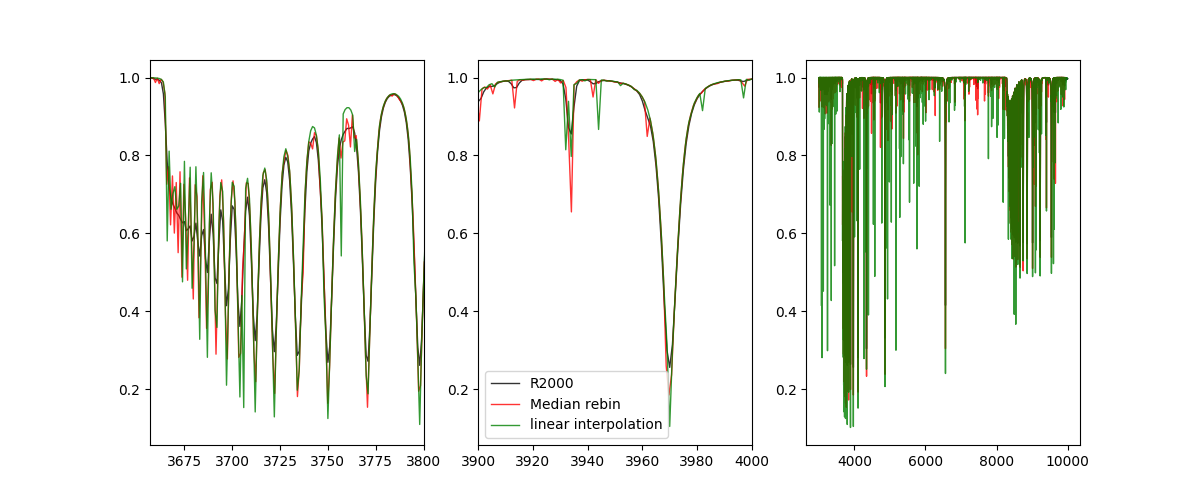

In [18]:
fig, ax = plt.subplots(1,3, figsize=(12, 5))

linewidth=1
alpha=0.8
[label.plot(spec1[0], spec1[1], 
        linewidth=linewidth, alpha=alpha, label="R2000", color="black") for label in ax]

[label.plot(sampled_spectrum['wave'], sampled_spectrum['flux']/max(sampled_spectrum['flux']), 
        linewidth=linewidth, alpha=alpha, label="Median rebin", color="red") for label in ax]

[label.plot(np.linspace(3000, 10000, len(spec1)), interp(np.linspace(3000, 10000, len(spec1)))/max(interp(np.linspace(3000, 10000, len(spec1)))), 
        linewidth=linewidth, alpha=alpha, label="linear interpolation", color="green") for label in ax]


#ax[1].plot(np.linspace(3000, 10000, len(spec2)), spec2[1], alpha=0.6)
#ax[1].plot(np.linspace(3000, 10000, len(spec1)), interp(np.linspace(3000, 10000, len(spec1))), alpha=0.6)

balmer_lines = [6564, 4861, 4340, 4107, 3970, 3889, 3835, 3646]

#[ax[0].axvline(line, color="black", linewidth=0.75) for line in balmer_lines]
#[ax[1].axvline(line, color="black", linewidth=0.75) for line in balmer_lines]
ax[0].set_xlim([3657, 3800])
ax[1].set_xlim([3900, 4000])
#ax[2].set_xlim([3900, 4000])
ax[1].legend()

#plt.savefig("rebin_example.png")
plt.show()

In [57]:
sampled_5000 = resample(spec2, 2000)
sampled_1000 = resample(spec2, 1000)

<IPython.core.display.Javascript object>


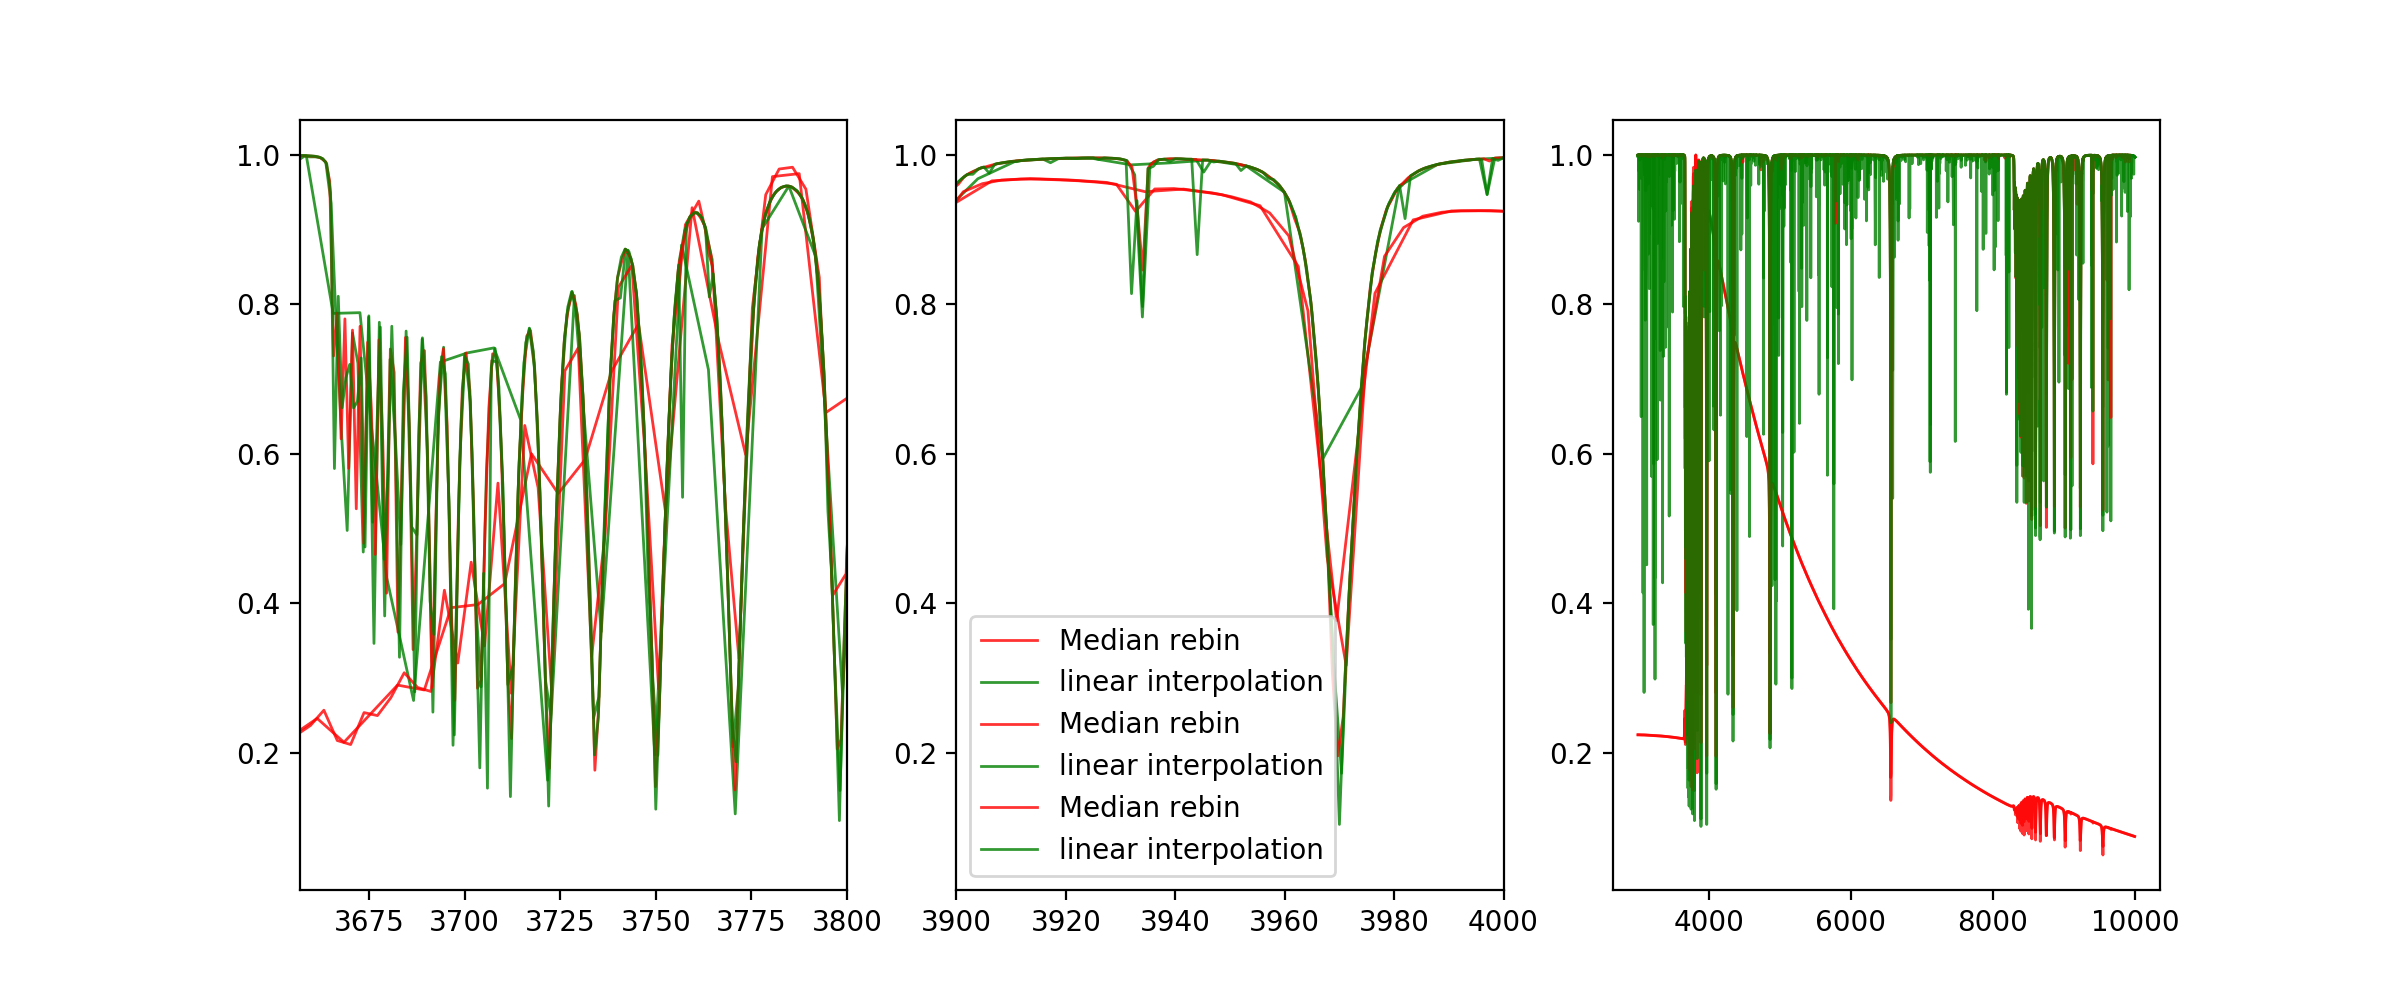

In [68]:





fig, ax = plt.subplots(1,3, figsize=(12, 5))

linewidth=1
alpha=0.8

[label.plot(sampled_1000['wave'], sampled_1000['flux']/max(sampled_1000['flux']), 
        linewidth=linewidth, alpha=alpha, label="Median rebin", color="red") for label in ax]

[label.plot(np.linspace(3000, 10000, 1000), 
            interp(np.linspace(3000, 10000, 1000))/max(interp(np.linspace(3000, 10000, 1000))), 
        linewidth=linewidth, alpha=alpha, label="linear interpolation", color="green") for label in ax]


[label.plot(sampled_5000['wave'], sampled_5000['flux']/max(sampled_5000['flux']), 
        linewidth=linewidth, alpha=alpha, label="Median rebin", color="red") for label in ax]

[label.plot(np.linspace(3000, 10000, 5000), interp(np.linspace(3000, 10000, 5000))/max(interp(np.linspace(3000, 10000, 5000))), 
        linewidth=linewidth, alpha=alpha, label="linear interpolation", color="green") for label in ax]


[label.plot(sampled_spectrum['wave'], sampled_spectrum['flux'], 
        linewidth=linewidth, alpha=alpha, label="Median rebin", color="red") for label in ax]

[label.plot(np.linspace(3000, 10000, len(spec1)), interp(np.linspace(3000, 10000, len(spec1)))/max(interp(np.linspace(3000, 10000, len(spec1)))), 
        linewidth=linewidth, alpha=alpha, label="linear interpolation", color="green") for label in ax]


#ax[1].plot(np.linspace(3000, 10000, len(spec2)), spec2[1], alpha=0.6)
#ax[1].plot(np.linspace(3000, 10000, len(spec1)), interp(np.linspace(3000, 10000, len(spec1))), alpha=0.6)

balmer_lines = [6564, 4861, 4340, 4107, 3970, 3889, 3835, 3646]

#[ax[0].axvline(line, color="black", linewidth=0.75) for line in balmer_lines]
#[ax[1].axvline(line, color="black", linewidth=0.75) for line in balmer_lines]
ax[0].set_xlim([3657, 3800])
ax[1].set_xlim([3900, 4000])
#ax[2].set_xlim([3900, 4000])
ax[1].legend()

plt.show()

In [52]:
len(spec1)

7001

<IPython.core.display.Javascript object>


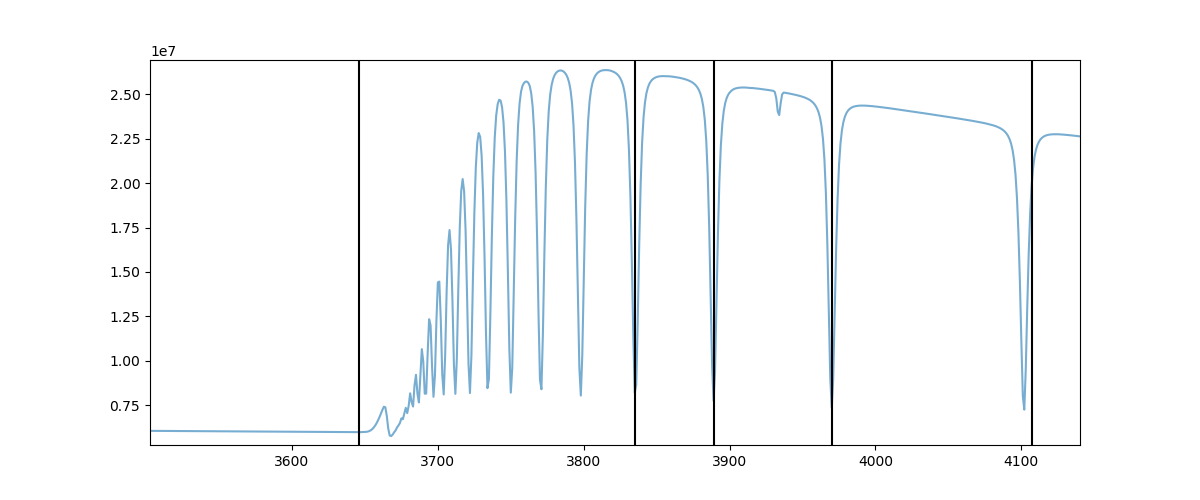

In [23]:
plt.figure(figsize=(12, 5))


plt.plot(np.linspace(3000, 10000, len(spec1)), spec1[2], alpha=0.6)


balmer_lines = [6564, 4861, 4340, 4107, 3970, 3889, 3835, 3646]

[plt.axvline(line, color="black") for line in balmer_lines]



plt.show()